# Market Segmentation using Mall Customer Data

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Mall_Customers.csv')
print(data.shape)
print(data.info())
data.head()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# data.drop(columns=['CustomerID','Gender'], axis=1, inplace=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]
corr = data.corr()
corr.style.background_gradient(axis=None)


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


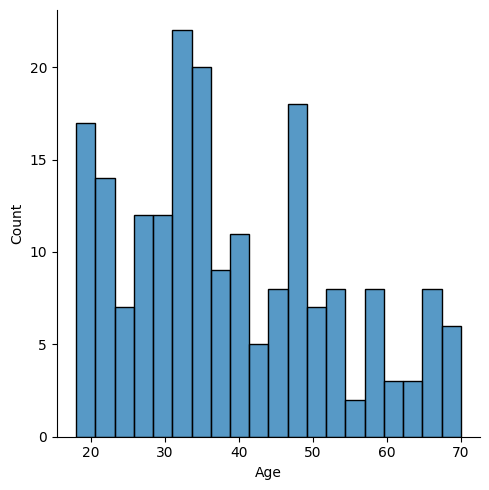

In [8]:
sns.displot(data['Age'], bins=20)


In [9]:
x= data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [10]:
# Building the model and calculating the scores¶

n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

#Add for loop to train the model and calculate inertia, silhouette score
for k in n_clusters:
    #Build the model
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=k, random_state=42))
    #Train the model
    model.fit(x)
    #Calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    #Calculate silhoutte
    silhouette_scores.append(
        silhouette_score(x, model.named_steps["kmeans"].labels_)
    )
print("Inertia:", inertia_errors[:3])
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [389.3861889564372, 295.4562449213556, 205.22514747675913]
Silhouette Scores: [np.float64(0.276257743689132), np.float64(0.3070331565443169), np.float64(0.3825939315551745)]


In [13]:
fig= px.line(x=n_clusters, y=inertia_errors, title="K-Means Model: Inertia vs Number of Clusters")

fig.show()

In [15]:
# Building the final model using k=6 as the optimal number of clusters,ie the point at the "elbow" or the point at which the cost start decreasing in a linear fashion
final_model = make_pipeline(StandardScaler(), KMeans(n_clusters=6, random_state=42))
final_model.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=6, random_state=42))])

In [17]:
labels= final_model.named_steps["kmeans"].labels_
print(labels[:5])

[2 2 5 2 5]


In [19]:
centroids= final_model.named_steps["kmeans"].cluster_centers_
centroids

array([[ 1.25472096, -0.24021294, -0.04399777],
       [-0.44191719,  0.99158305,  1.23950275],
       [-0.95377931, -1.30081415,  1.01091344],
       [-0.91323113, -0.0433223 , -0.22322397],
       [ 0.36959845,  1.12879725, -1.25264236],
       [ 0.47895722, -1.30822992, -1.19644353]])

In [ ]:
# Creating a DataFrame df which contains the mean values of the features in x, for each of the clusters in the final_model

df= x.groupby(labels).mean()
df

,Age,Annual Income (k$),Spending Score (1-100)
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.560000,26.480000,76.240000
3,26.125000,59.425000,44.450000
4,44.000000,90.133333,17.933333
5,45.523810,26.285714,19.380952
